

---


**Desafio #ImersãoDados**

Thiago Passos Oliveira

LinkedIn: linkedin.com/in/thiago-passos-oliveira-a55aa51b5

Email: passos.thiago2001@gmail.com


---


Objetivo princial: 

Verificar quais parâmetros podem estar associdados a médias gerais mais altas e mais baixas, e consequêntemente as chances ao acesso ao ensino superior público.

Objetivos secundários: 

Expor de maneira simples o raciocínio utilizado nas correlações;

Utilizar gráficos que simplifiquem as intensões da análise.


---


DataSet: o mesmo utilizado na **#ImersãoDados**

**Importação de packs e arquivos**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

source_address = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
info = ' - Consultar Dicionário Microdados ENEM 2019'

all_data = pd.read_csv(source_address)
all_data.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B




---


**Análise Exploratória**


---


Objetivo: filtrar dados que possam ser relavantes para a construção de uma hipótes para as questões abordadas.

Questão norteadora: como se distribuem as notas médias e de redação; quais fatores acompanham essa distribuição; quais/como são os limites inferiores, superiores, "gaps"; quais dados que não constam no dataset poderiam ser úteis para melhorar a análise.

As notas das 4 áreas (NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC e NU_NOTA_MT) e a nota de redação (NU_NOTA_REDACAO) farão uma média aritmética (geralmente utilizadas como nota base para procesos seletivos via SISU para o acesso ao ensino superior). As médias calculadas como 0 serão desconsideradas pois relaciona-se aos participantes que provavelmente não realizaram a prova por qualquer motivo, uma vez que a chance de alguém realizar pelo menos uma prova (exceto a redação) e zerá-la é irrisória.

In [ ]:
tests = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
all_data['NU_MEDIA_GERAL'] = all_data[tests].mean(axis=1)

all_data = all_data.query('NU_MEDIA_GERAL > 0')
tests.append('NU_MEDIA_GERAL')
all_data[tests].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_MEDIA_GERAL
0,435.6,512.3,488.6,432.4,420.0,457.780000
1,NaN,409.3,375.3,NaN,400.0,394.866667
2,423.2,499.1,441.0,427.2,560.0,470.100000
3,426.2,578.1,551.5,499.9,500.0,511.140000
4,516.5,571.3,511.2,424.5,780.0,560.700000


In [ ]:
all_data[tests].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_MEDIA_GERAL
count,92753.000000,98002.000000,98002.000000,92753.000000,98002.000000,98218.000000
mean,477.989780,507.578173,520.681669,523.583429,571.809147,519.407350
std,76.217405,82.338522,63.686110,109.352341,187.752013,86.037525
min,0.000000,0.000000,0.000000,0.000000,0.000000,73.333333
25%,418.000000,448.000000,483.800000,435.300000,480.000000,461.325000
50%,470.200000,511.000000,526.100000,501.600000,580.000000,513.120000
75%,533.300000,567.100000,565.100000,598.300000,680.000000,574.500000
max,797.300000,809.400000,801.700000,985.000000,1000.000000,832.820000


In [ ]:
print(all_data.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_TEMPO_ADICIONAL' 'IN_LEITURA_LABIAL'
 'IN_MESA_CADEIRA_RODAS' 'IN_MES



---


**EXPLORAÇÃO DAS HIPÓTESES**


---


Os seguintes parâmetros foram tomados inicialmente como hipóteses de maior influência com a média geral:

Escolaridade dos pais;

Trabalho/ocupação dos pais;

Acesso à celulares, computadores, internet;

Idade;

UF de ensino; 

Ano de conclusão do Ensino Médio;

Tipo de escola;

Situação socioeconômica.

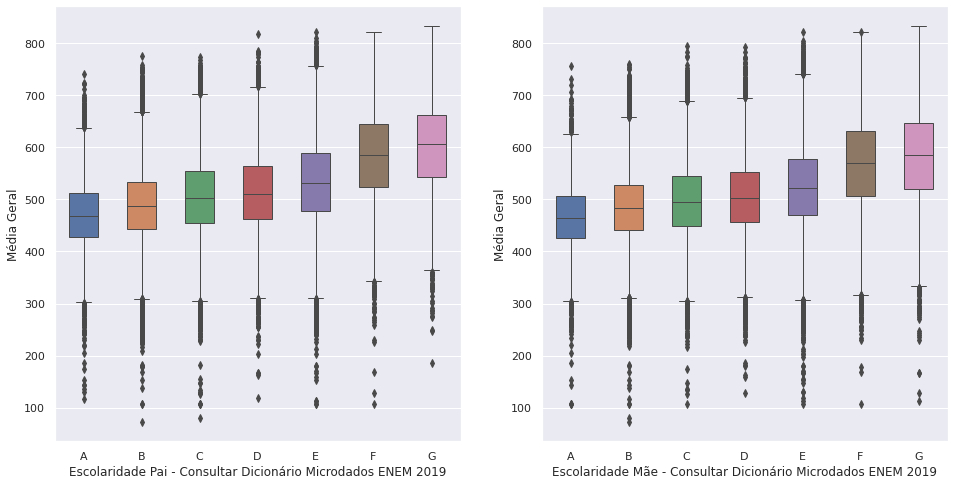

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(16, 8))
sns.boxplot(data=all_data, y='NU_MEDIA_GERAL', x='Q001', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ax=ax[0], linewidth=1, width=0.5)
sns.boxplot(data=all_data, y='NU_MEDIA_GERAL', x='Q002', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ax=ax[1], linewidth=1, width=0.5)
ax[0].set(ylabel="Média Geral", xlabel="Escolaridade Pai"+info)
ax[1].set(ylabel="Média Geral", xlabel="Escolaridade Mãe"+info)
fig.show()

A sequência de A-G está organizada de modo crecente ao nível de escolaridade dos pais. Percebe-se um crescimento sinuoso na média geral a medida que a escolariadade dos pais aumenta, sobretudo nas categorias F e G (completou a faculdade e a pós-graduação respectivamente) com o aumento dos boxs e na posição dos quantis, como se efetuassem um pequeno salto.

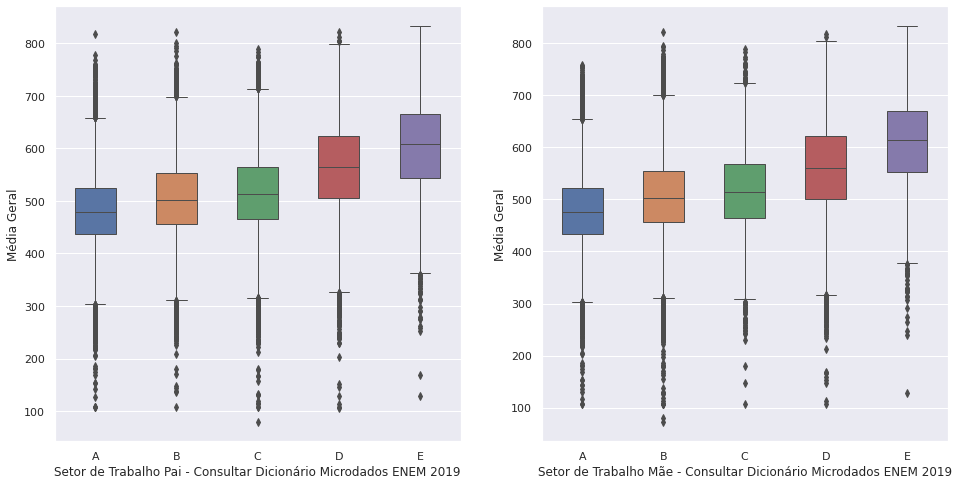

In [ ]:
fig2, ax2 =plt.subplots(1,2, figsize=(16, 8))
sns.boxplot(data=all_data, y='NU_MEDIA_GERAL', x='Q003', order=['A', 'B', 'C', 'D', 'E'], ax=ax2[0], linewidth=1, width=0.5)
sns.boxplot(data=all_data, y='NU_MEDIA_GERAL', x='Q004', order=['A', 'B', 'C', 'D', 'E'], ax=ax2[1], linewidth=1, width=0.5)
ax2[0].set(ylabel="Média Geral", xlabel="Setor de Trabalho Pai"+info)
ax2[1].set(ylabel="Média Geral", xlabel="Setor de Trabalho Mãe"+info)
fig2.show()

A sequência de A-E está organizada de modo crescente ao "nível de prestígio social" que a sociedade no senso comum encaixa cada ocupação dos pais. Também pode estar associado de modo crescente a renda obtida a longo prazo por esses grupos. Percebe-se um crescimento semelhante ao boxplot anterios relacionado a escolariade, o que faz sentido dentro da relação de formação escolar/profissional e área de atuação no mercado de trabalho. Os grupos D e E incluem agentes como professores, militares, autônomos, latifundiários, médicos, advogados, entre outros.

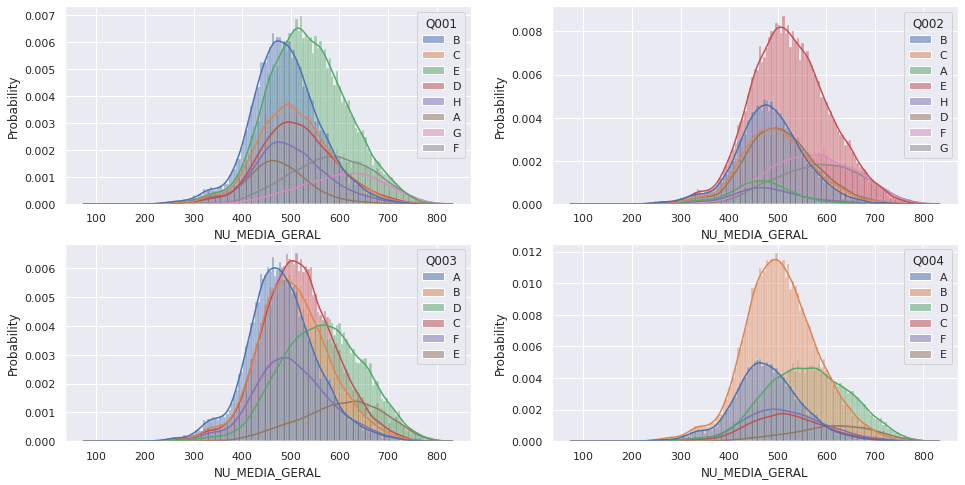

In [ ]:
fig11, ax11 =plt.subplots(2,2, figsize=(16, 8))
sns.histplot(data=all_data, x='NU_MEDIA_GERAL', hue='Q001', stat="probability", kde=True, ax=ax11[0][0])
sns.histplot(data=all_data, x='NU_MEDIA_GERAL', hue='Q002', stat="probability", kde=True, ax=ax11[0][1])
sns.histplot(data=all_data, x='NU_MEDIA_GERAL', hue='Q003', stat="probability", kde=True, ax=ax11[1][0])
sns.histplot(data=all_data, x='NU_MEDIA_GERAL', hue='Q004', stat="probability", kde=True, ax=ax11[1][1])
fig11.show()

Espera-se que a combinação entre escolariade e bons rendimentos profissionais (principalmente se vierem em virtude da escolaridade) tenha como resultado pais que podem financieramente e querem custear melhores condições de estudo e consequêntemente, espera-se que isso impacte a média geral no ENEM.

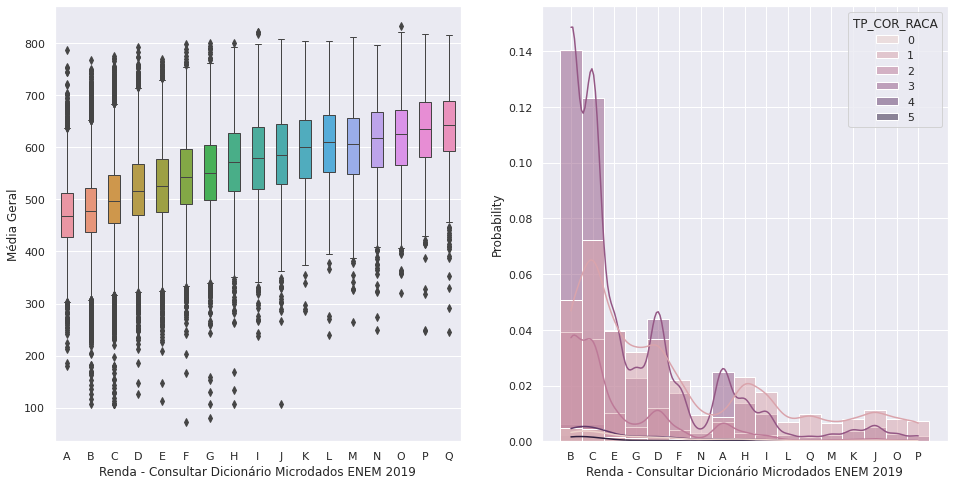

In [ ]:
fig7, ax7 =plt.subplots(1,2, figsize=(16, 8))
sns.boxplot(data=all_data, y='NU_MEDIA_GERAL', x='Q006', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M','N', 'O', 'P', 'Q'], linewidth=1, width=0.5, ax=ax7[0])
sns.histplot(data=all_data, x='Q006', ax=ax7[1], stat='probability', hue='TP_COR_RACA', kde=True)
ax7[0].set(ylabel="Média Geral", xlabel="Renda"+info)
ax7[1].set(xlabel="Renda"+info)
fig7.show()

In [ ]:
print('Renda\n{}'.format(all_data['Q006'].value_counts(normalize=True).sort_index()))

Renda
A    0.043566
B    0.243357
C    0.244365
D    0.097243
E    0.093496
F    0.045307
G    0.062606
H    0.041276
I    0.030819
J    0.018265
K    0.012890
L    0.009845
M    0.009642
N    0.013368
O    0.011637
P    0.009947
Q    0.012370
Name: Q006, dtype: float64


A correlação entre a renda é ainda mais acentuada, para os quais a mediana (segundo quantil) nos grupos de renda superior 8.000 reais supera bastante os 600 pontos, além do limite inferior estar acima do box de outros grupos. Contudo, a maior parte dos participantes (mais de 50%) se enquadra nas categorias B e C, com renda até 1.500 reais e notas mais próximas a 450 - 500 pontos.

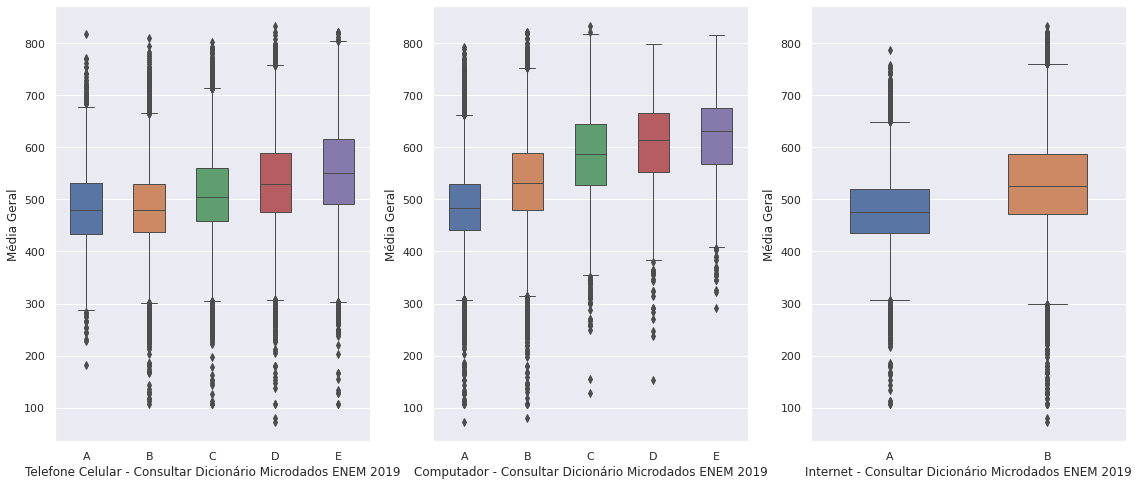

In [ ]:
fig3, ax3 =plt.subplots(1,3, figsize=(19.2, 8))
sns.boxplot(data=all_data, y='NU_MEDIA_GERAL', x='Q022', order=['A', 'B', 'C', 'D', 'E'], ax=ax3[0], linewidth=1, width=0.5)
sns.boxplot(data=all_data, y='NU_MEDIA_GERAL', x='Q024', order=['A', 'B', 'C', 'D', 'E'], ax=ax3[1], linewidth=1, width=0.5)
sns.boxplot(data=all_data, y='NU_MEDIA_GERAL', x='Q025', order=['A', 'B',], ax=ax3[2], linewidth=1, width=0.5)
ax3[0].set(ylabel="Média Geral", xlabel="Telefone Celular"+info)
ax3[1].set(ylabel="Média Geral", xlabel="Computador"+info)
ax3[2].set(ylabel="Média Geral", xlabel="Internet"+info)
fig3.show()

No que se refere a posse ou não de telefone celular (interpretado aqui como smartphone), percebe-se um crescimento suave da nota quanto a quantidade de celulares. Mas isso provavelmente está associado a condição socioeconômica dos participantes e o reflexo disso na educação como um todo, e não objetivamente pela posse do aparelho (será explano abaixo).

A posse de computadores contudo pare possui relação mais evidente, principalmente pelos aumentos de quadril secundário (médiana) logo nas classificações B e C (1 e 2 computadores rescpectivamente) comparado a A (não possui nenhum). Esse comportamento não ocorre com a posse de celulares, acusando uma provável falsa correlação. O motivo desse efeito pode estar relacionado ao uso dos equipamentos e o impacto ques estes tem como os estudos para o ENEM.

O acesso à internet também compõe um crescimento interessante em relação à média geral, possívelmente relativo ao acesso fácil e rápido a informações em horários extra escolares e/ou após o ensino médio. Esse acesso também está associado à posse conjunta de smartphones e/ou computadores (e semelhantes).

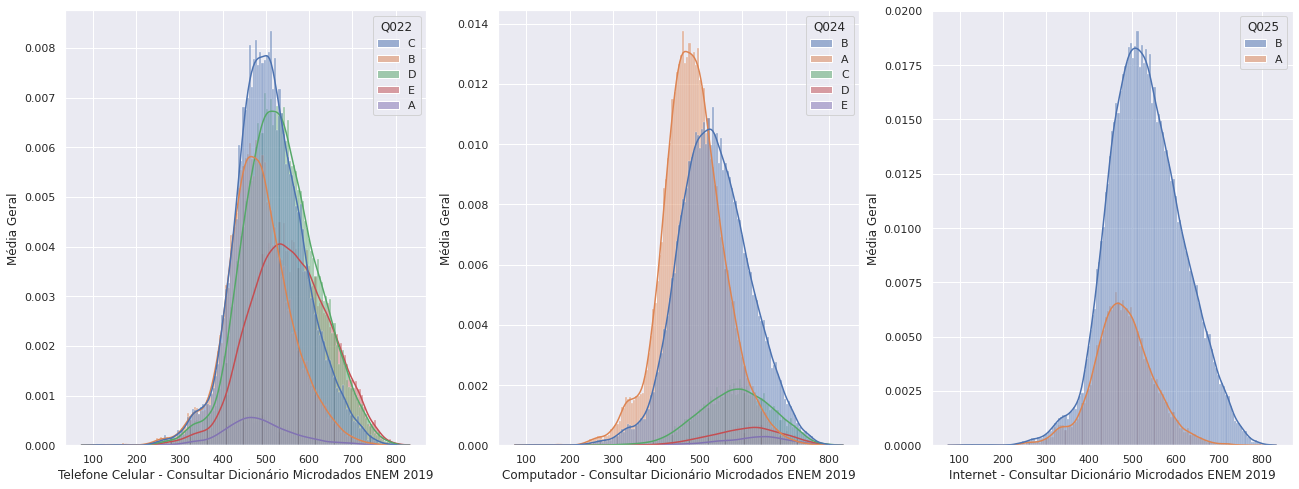

In [ ]:
fig12, ax12 =plt.subplots(1,3, figsize=(22, 8))
sns.histplot(data=all_data, x='NU_MEDIA_GERAL', hue='Q022', stat="probability", kde=True, ax=ax12[0])
sns.histplot(data=all_data, x='NU_MEDIA_GERAL', hue='Q024', stat="probability", kde=True, ax=ax12[1])
sns.histplot(data=all_data, hue='Q025', stat='probability', x='NU_MEDIA_GERAL', kde=True, ax=ax12[2])
ax12[0].set(ylabel="Média Geral", xlabel="Telefone Celular"+info)
ax12[1].set(ylabel="Média Geral", xlabel="Computador"+info)
ax12[2].set(ylabel="Média Geral", xlabel="Internet"+info)
fig12.show()

In [ ]:
print('Celular\n{}\n'.format(all_data['Q022'].value_counts(normalize=True)))
print('Computador\n{}\n'.format(all_data['Q024'].value_counts(normalize=True)))
print('Internet\n{}'.format(all_data['Q025'].value_counts(normalize=True)))

Celular
C    0.300688
D    0.285223
B    0.198833
E    0.194791
A    0.020465
Name: Q022, dtype: float64

Computador
A    0.444939
B    0.436987
C    0.082246
D    0.024934
E    0.010894
Name: Q024, dtype: float64

Internet
B    0.786506
A    0.213494
Name: Q025, dtype: float64


Quanto mais a direita, maior a concentração de notas maiores para cada critério.

No telefone celular, o grau de desvio é menos impactante, apesar das quantidades de celulares serem proximamente distribuídos. A presença de 1 celular não representou mudança relevante na concentração das notas.

No computador, a associação do crescimento é mais forte, evienciado pelo translado do pico das curvas sempre à direita. A aquisição de 1 computador é já demonstrou uma mudança interresante, principalmente por ter uma quantidade de pessoas que possuem próxima as que não possuem nenhum computador.

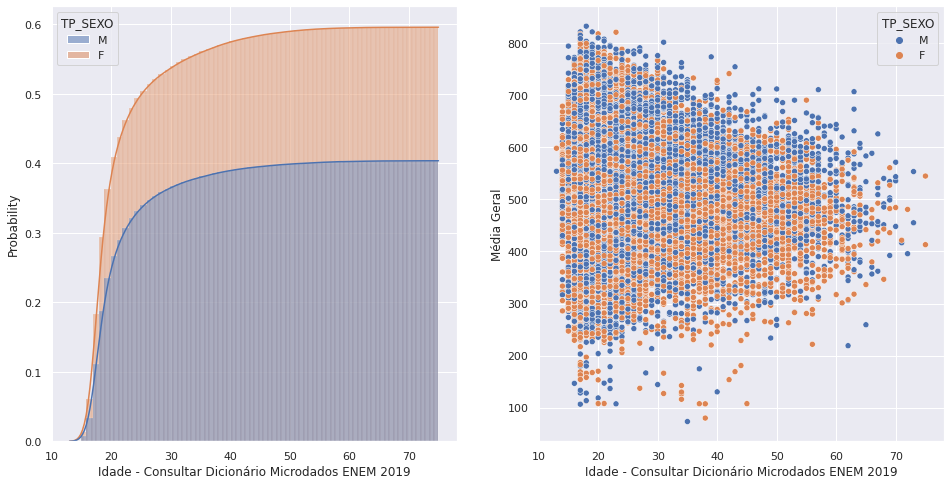

In [ ]:
fig6, ax6 =plt.subplots(1,2, figsize=(16, 8))
sns.histplot(data=all_data, x='NU_IDADE',kde=True, stat='probability', ax=ax6[0],  cumulative=True, hue='TP_SEXO')
sns.scatterplot(data=all_data, y='NU_MEDIA_GERAL', x='NU_IDADE', ax=ax6[1], hue='TP_SEXO')
ax6[0].set(xlabel="Idade"+info)
ax6[1].set(ylabel="Média Geral", xlabel="Idade"+info)
fig6.show()

Com relação a idade, percebe-se o predomínio de jovens até 24 anos representando 80% dos participantes da prova. Com relação a distribuição dos pontos por idade, percebe-se que quanto mais velho se realiza o exame, mais afunilado tende a ser o *range* de notas, diminuindo a nota máxima provável e aumentando a nota mínima provável. Contudo é díficl especular esse comportamento, uma vez que não se tem tantos detalhes sobre se isso ocorre em virtude da porcentagem reduzida de mais velhos, se estes estudam e trabalham, quantidade de vezes que fizeram o ENEM, se já tem graduação, entre outros fatores.

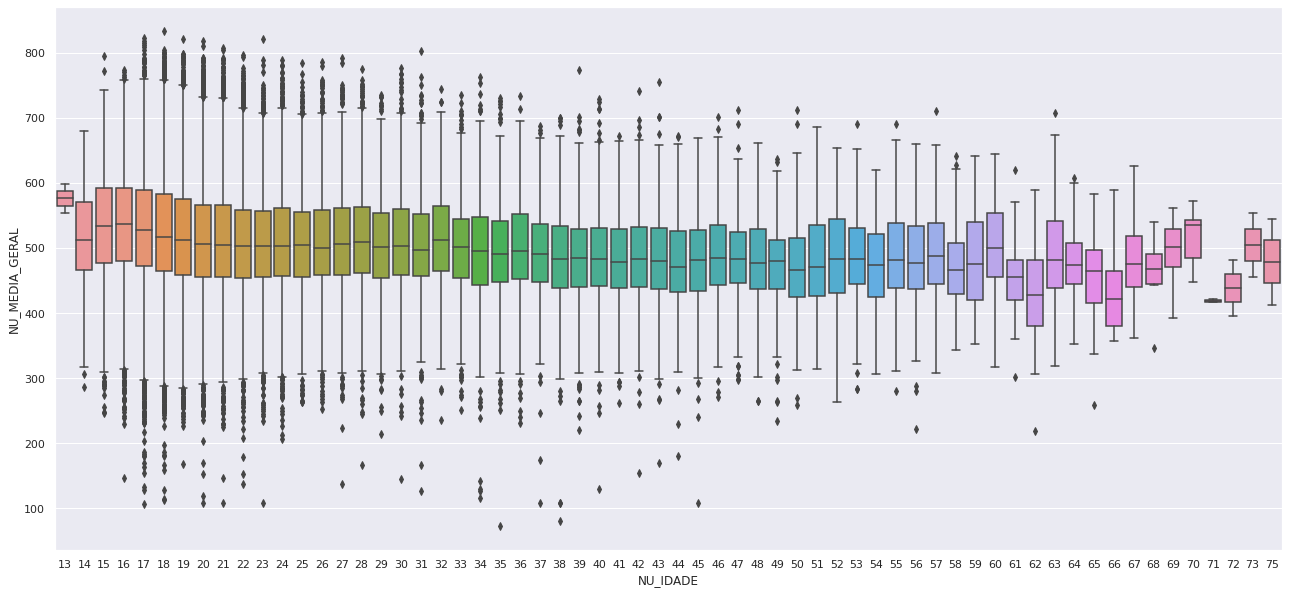

In [ ]:
plt.figure(figsize=(22,10))
sns.boxplot(data=all_data, y='NU_MEDIA_GERAL', x='NU_IDADE')

Apensar do comportamento exposto no gráfico anterior, a mediana das notas segue próxima aos 500 pontos, exeto a partir de 60 anos, aprensentando muita oscilação, novamente ressaltando as dificuldades de se supor algo sobre.

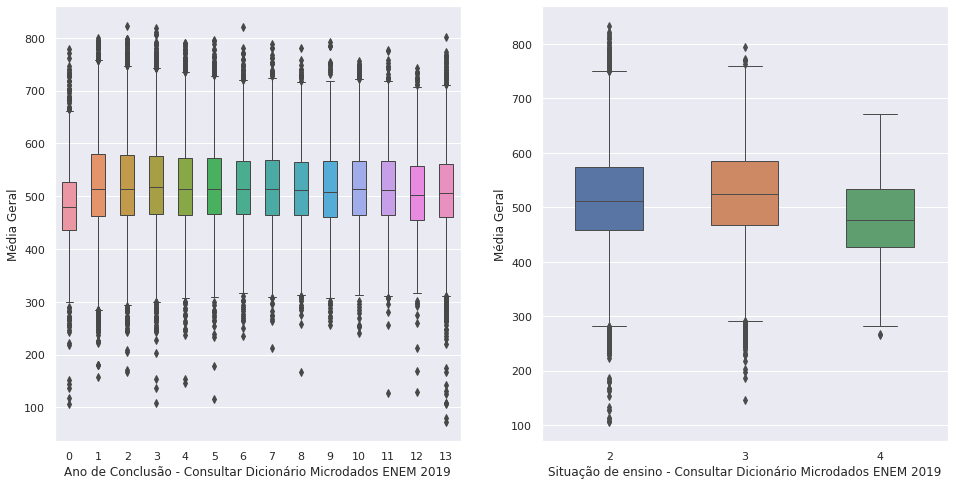

In [ ]:
fig4, ax4 =plt.subplots(1,2, figsize=(16, 8))
sns.boxplot(data=all_data.query('TP_ST_CONCLUSAO != 1'), y='NU_MEDIA_GERAL', x='TP_ST_CONCLUSAO', ax=ax4[1], linewidth=1, width=0.5)
sns.boxplot(data=all_data.query('TP_ST_CONCLUSAO == 1'), y='NU_MEDIA_GERAL', x='TP_ANO_CONCLUIU', ax=ax4[0], linewidth=1, width=0.5)
ax4[1].set(ylabel="Média Geral", xlabel="Situação de ensino"+info)
ax4[0].set(ylabel="Média Geral", xlabel="Ano de Conclusão"+info)
fig4.show()

Text(0.5, 0, 'Ano de Conclusão - Consultar Dicionário Microdados ENEM 2019')

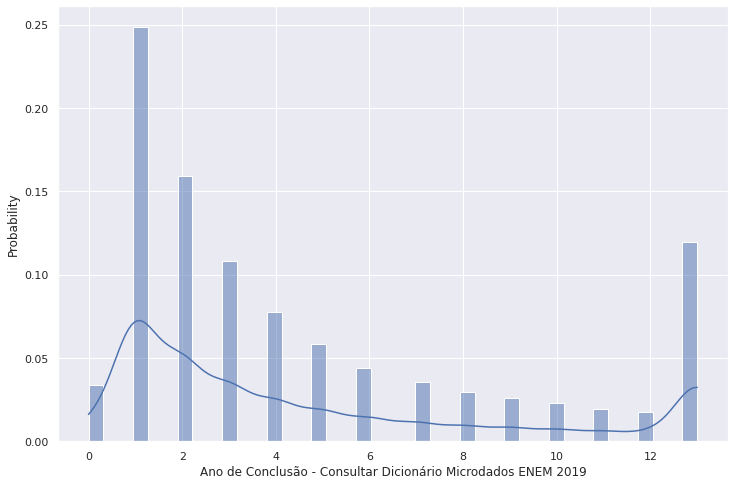

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=all_data.query('TP_ST_CONCLUSAO == 1'), x='TP_ANO_CONCLUIU', stat='probability', kde=True)
plt.xlabel('Ano de Conclusão'+info)

In [ ]:
print('Situação\n{}\n'.format(all_data['TP_ST_CONCLUSAO'].value_counts(normalize=True)))
print('Da % da opção 1 do índice acima:\n{}\n'.format(all_data['TP_ANO_CONCLUIU'].value_counts(normalize=True).sort_index()))

Situação
1    0.528101
2    0.324747
3    0.144139
4    0.003014
Name: TP_ST_CONCLUSAO, dtype: float64

Da % da opção 1 do índice acima:
0     0.489605
1     0.131259
2     0.083997
3     0.057189
4     0.040970
5     0.030819
6     0.023377
7     0.018897
8     0.015517
9     0.013867
10    0.011994
11    0.010253
12    0.009173
13    0.063084
Name: TP_ANO_CONCLUIU, dtype: float64



Em relação ao ano de conclusão do Ensino Médio, entende-se que quanto mais distante o ano de execussão da prova (o analisado em questão é 2019) do ano de conclusão do EM, mais distante distante o partifipante estaria  dos conhecimentos cobrados no exame, uma vez que se a distância é 0 anos, o indivíduo está e pelo menos 3 anos preparando-se supostamente. A medida que esse período cresce, espera-se que no geral as médias caiam, contudo, percebe-se relativa estabilidade na nota média. Isso denota uma provável preparação no sentido de reforçar os conhecimentos adquiridos durante o ensino médio. Contudo, não há mais detalhes sobre as atividades desses indivíduos, se estes se preparam ou não, se trabalham e preparam-se concomitantemente, apenas trabalham, não preparam-se, entre outros.

Apesar de manter-se relativamente a concentração das notas, há a redução exponencial dos participantes, sendo predominantes os participantes concludentes no ano anterior. A queda provavelmente relaciona-se a desistância em persistir  a medida que não se adquirir os resultados que se almeja em outros anos no exame, optando por seguir outro caminho não relacionado à faculdades públicas ou financiadas ou por já estar ingresso. Cabia mais detelhes para compreender a redução.

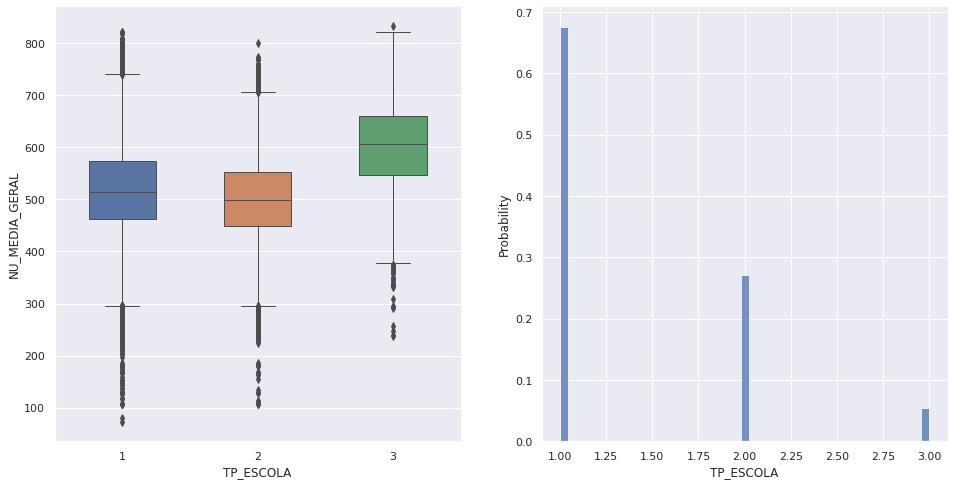

In [ ]:
fig13, ax13 =plt.subplots(1,2, figsize=(16, 8))
sns.boxplot(data=all_data, y='NU_MEDIA_GERAL', x='TP_ESCOLA', linewidth=1, width=0.5, ax=ax13[0])
sns.histplot(data=all_data, x='TP_ESCOLA', stat='probability', ax=ax13[1])
fig13.show()

In [ ]:
print('Treineiro', len(all_data.query('IN_TREINEIRO == 1')), '| Não Treineiro', len(all_data.query('IN_TREINEIRO == 0')))

Treineiro 14157 | Não Treineiro 84061


Apesar de boa parte (quase 70%) não responder qual o tipo de escola paticipou, provavelmente por não estarem realizando a prova durante o curso do Ensino Médio.

Entre os que responderam (2 (Escola Pública) e 3(Escola Particular)), o parâmetro escola particular alavanca bastante as médias, comparando todos os quantis em relação a escola pública em quase 100 pontos na média geral. Desconsiderando os que não responderam objetivamente a questão, pouco mais de 15% aponta como oriundo de escola particular e cerca de 85% de escola pública.

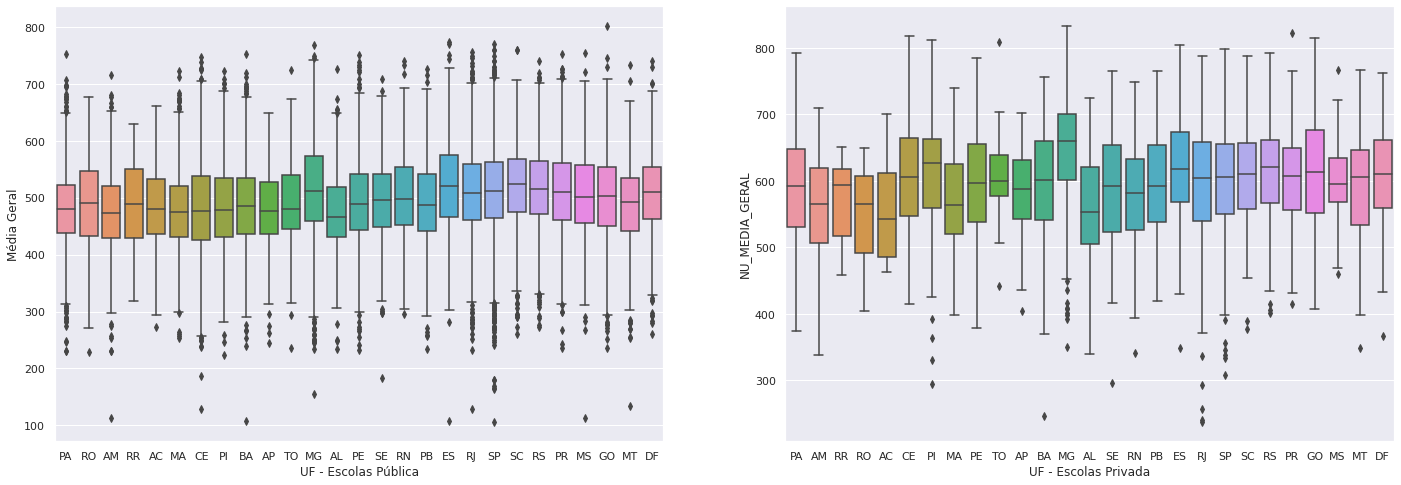

In [ ]:
fig8, ax8 =plt.subplots(1,2, figsize=(24, 8))
sns.boxplot(data=all_data.query('TP_ESCOLA == 2'), x='SG_UF_RESIDENCIA', y='NU_MEDIA_GERAL', ax=ax8[0])
sns.boxplot(data=all_data.query('TP_ESCOLA == 3'), x='SG_UF_RESIDENCIA', y='NU_MEDIA_GERAL', ax=ax8[1])
ax8[1].set(xlabel="UF - Escolas Privada")
ax8[0].set(ylabel="Média Geral", xlabel="UF - Escolas Pública")
fig8.show()

As variações de distribuição quanto a UF não são muito evidentes, ficando próximo a 500 pontos no geral. Contudo, cabe detectar os melhores índices como MG, SC e ES; os piores índices como AC, RR, AL. Esse resultado é esperado, comparando analogamente aos dados da educação básica por estado, os quais apontam para os estados do Sul, Sudeste e Centro-Oeste com uma educação pública melhor que do Norte e Nordeste.

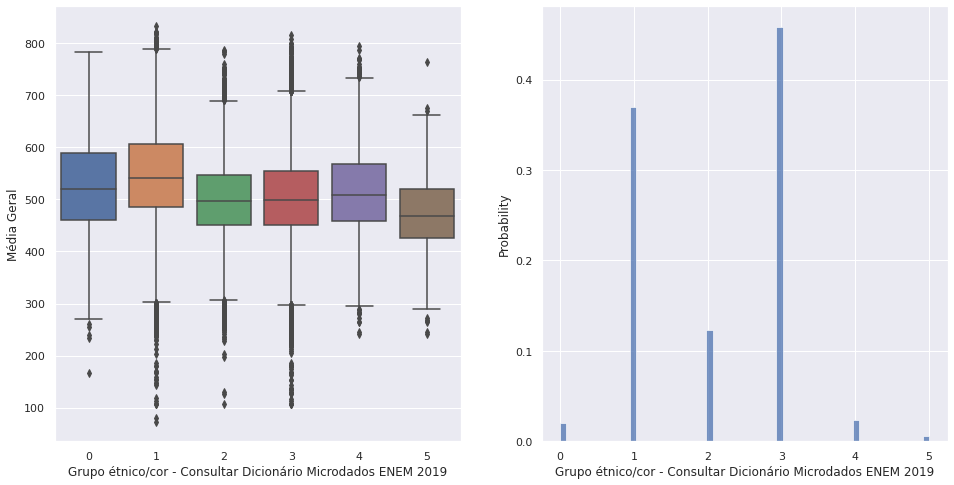

In [ ]:
fig10, ax10 =plt.subplots(1,2, figsize=(16, 8))
sns.boxplot(data=all_data, x='TP_COR_RACA', y='NU_MEDIA_GERAL', ax=ax10[0])
sns.histplot(data=all_data, x='TP_COR_RACA', ax=ax10[1], stat='probability')
ax10[1].set(xlabel="Grupo étnico/cor"+info)
ax10[0].set(ylabel="Média Geral", xlabel="Grupo étnico/cor"+info)
fig10.show()

Em relação a autoidentificação étnica/cor dos participaantes, os dois principais grupos (80%) brancos e pardos em patamares distintos quanto a nota, possivelmente por causa dos grupos socioeconômicos aos quais esses dois pertencem e por consequência o investimento possível em educação.



---


**CONCLUSÕES**


---
Dos dados tomados como hipóteses, pode-se concluir que:


**Escolaridade, trabalho/ocupação e situação socioeconômica dos pais** são questões correlatas entre si e que têm impacto importante para a distribuição de notas melhores na média geral. Contudo, esse parâmetro não se mostrou disperso homogeneamente pelos participantes, mas se restringiu a partes históricamente mais ricas. Isso faz sentido uma vez que mudanças educacionais e econômicas levam em geral tempo para mudarem para uma distribuição mais homogênea, uma vez que iniciou de maneira concentrada.


---


**Acesso à celulares, computadores e internet** são questões que podem ser "sintetizadas" ao acesso a tecnologia e a sua utilização no ambiente educacional. Apesar da relação com os  telefones celulares não apontar para grandes influências na nota, é uma ferramenta que tem potencial (creio que falta uma mudança cultral quanto a isso) e é um aparelho que está bem distribuído pelos participante. O computador evidenciou melhor como esse acesso impacta a melhoria da educação, juntamente com o acesso a internet, tornando o acesso ao conhecimento mais ambrangente, simples e com mais opções metodológicas de ensino.


---


**Idade e ano de conclusão do Ensino Médio** são fatores que tendem a conter mais as notas. Apesar das medianas serem muito próximas com o passar da idade dos participantes, a quantidade do mais velhos tende a reduzir exponencialmente sua participação no exame, possivelmente devido a fatores externos como trabalho, família, entre outros que surgem em geral após o Ensino Médio. Contudo seria interessante pesquisas qualitativas/quantitativas a esse respeito a fim de enterder melhor a razão desse comportamento com os veteranos.


---


**UF de ensino e tipo de escola** refletem muito as diferenças regionais e de tipo de ensino no Brasil. Conforme mensionado, a discrepância no nível de ensino básico (fornecido pelo Ministério da Educação) tendem a refletir na média no ENEM. As diferenças entre escolas públicas e privadas também são marcantes, com desempenho melhor para as privadas, provavelmente pelo nível de investimento e modelo de ensino/estratégico, muitas vezes focando o ENEM como um objetivo durante Ensino Médio. A localização das escolas privadas pelo Brasil também não são imunes as diferenças regionais segundo os dados, mas no geral tem melhor desempenho que as públicas. A participação em escolas privadas é consequência provável de escolaridade, trabalho/ocupação e situação socioeconômica dos pais mais favoráveis.

É preciso que essa amostragem do *dataset* represente todo o conjunto, que não possua nenhum tipo de vício que possa prejudicar a análise dos dados. Contudo, apenas determinar essas correlações efetuadas, é de extrema importância que essas condições tomadas como relevantes possam ser testadas, validadas e reproduzidas em outros *datasets* com distribuição semelhante, de outros anos de aplicação do Exame Nascional do Ensino Médio.

A fim de reslacionar a questão inicial do acesso ao ensino superior público com os fatores suspeitos de causalidade com o desempenho no ENEM, percebe-se que a curto prazo o acesso à internet e a computadores, sobretudo com o avanço da idade são pontos essenciais. A longo prazo, pensa-se no investimento a longo prazo desde os anos iniciais em ensino de qualidade, a medida que espera-se que isso influêncie em cadeia a escolaridade e a situação socioeconômica com mudanças perceptíveis na escala de gerações.



---


**FONTES EXTERNAS UTILIZADAS COMO REFERÊNCIA**


---


https://seaborn.pydata.org/index.html

http://comcept.org/cepticismo/correlacao-nao-implica-necessariamente-causalidade/


https://www.qedu.org.br/brasil/ideb/ideb-por-estados?dependence=2&grade=3&edition=2019

https://www.mundovestibular.com.br/enem/sisu/notas-de-corte-sisu-2020-2/#:~:text=Para%20ser%20selecionado%20na%20maioria,notas%20superiores%20a%20700%20pontos.